# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [6]:
hospital_read_df.head(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [7]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [10]:
hospital_read_df['Number of Discharges'].value_counts()

Not Available    5282
0                  81
172                45
111                40
137                39
119                39
110                37
92                 36
126                36
114                35
193                35
100                35
93                 35
132                34
185                34
108                34
117                33
169                33
91                 33
97                 33
140                33
152                33
120                32
158                32
233                32
127                32
241                32
303                32
106                32
225                32
                 ... 
1766                1
807                 1
922                 1
1406                1
1307                1
1343                1
1725                1
1310                1
975                 1
1815                1
691                 1
1416                1
848                 1
1290                1
1111      

In [11]:
hospital_read_df['Footnote'].value_counts()

1.0    1679
5.0    1369
7.0      81
Name: Footnote, dtype: int64

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [32]:
clean_hospital_read_df['Expected Readmission Rate'].value_counts()

21.2    151
16.8    146
22.2    143
20.8    141
5.1     141
22.0    138
21.3    138
17.3    137
21.7    136
20.9    134
21.4    134
21.9    134
20.4    131
20.7    131
17.5    130
17.1    130
21.8    129
17.6    129
17.2    129
21.1    128
16.3    128
21.0    127
16.4    127
22.3    125
22.1    125
18.1    124
21.5    124
16.9    124
17.0    123
17.7    123
       ... 
25.8      3
4.0       3
6.9       3
13.0      3
13.3      3
26.0      3
7.2       3
26.3      3
27.0      2
13.4      2
4.2       2
3.9       2
7.0       2
26.7      2
28.0      2
25.7      2
7.5       1
13.2      1
13.8      1
7.7       1
12.3      1
7.4       1
26.4      1
27.9      1
27.1      1
7.8       1
27.7      1
12.6      1
26.8      1
7.1       1
Name: Expected Readmission Rate, dtype: int64

All numerical without NAN values.

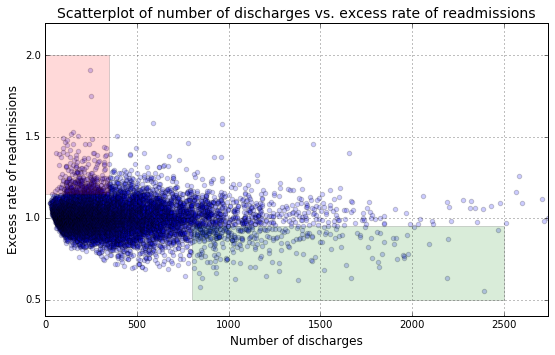

In [19]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]] # cut the last three data points to make the plot nicer
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 59% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

### 1) statistical analysis of the data

- In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 59% have excess readmission rate greater than 1.
- In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.

In [25]:
low_discharge = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio']
high_discharge = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio']

In [26]:
np.mean(low_discharge)

1.0226183501683506

In [34]:
np.std(low_discharge)

0.05795419632801004

In [27]:
np.mean(high_discharge)

0.9783354211663071

In [35]:
np.std(high_discharge)

0.11987768585552241

In [30]:
len([i for i in low_discharge if i > 1])/len(low_discharge)

0.5918045705279747

In [31]:
len([i for i in high_discharge if i > 1])/len(high_discharge)

0.4449244060475162

In [36]:
len(low_discharge)

1269

In [37]:
len(high_discharge)

463

All above statements are correct.

### 2) diagnose the conclusion part

- There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
- Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

This conclusion is equal to the following statement:

- Smaller hospitals with number of discharge < 100 have higher excess readmission rate than bigger hospitals with number of discharge > 1000.

This conclusion can be tested by the following hypothesis test:

- H_null: A == B
- H_alternative: A > B

A is readmission rate of hospitals with number of discharge < 100. B is readmission rate of hospitals with number of discharge > 1000.

Let's do t test for these two independent samples:
- Mean of A is 1.023
- Standard deviation of A is 0.058
- n(A) = 1269
- Mean of B is 0.978
- Standard deviation of B is 0.120
- n(B) = 463

S(A-B) = np.sqrt(0.058^2/1269 + 0.120^2/463) = 0.0058

t_statistic = (1.023 - 0.978)/0.0058 = 7.758

One-tailed test for α = .01, degree of freedom = n(A) + n(B) - 1 = 1731, we have t_critical =  2.326


Thus, t_statistic > t_critical, we have to reject the null hypothesis and accept the alternative hypothesis.
### 3) Statistical significance:
The P-Value is < .00001.

P-Value is smaller than the significance level α. ***So A and B are statistically significant at level α = 0.01.*** We have to reject the null hypothesis and accept the alternative hypothesis.

#### The initial conclusion is correct: 
- There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
- Small hospitals with number of discharge < 100 has higher excess readmission rate than bigger hospitals with number fo discharge > 1000.  

### 4) Difference between statistical significance and practical significance:
- Statistical significance refers to the unlikelihood that mean differences observed in the sample have occurred due to sampling error. For determining statistical significance, significance level is used. P-value is the probability that the test statistic being computed would acquire a value equal to or less than the fixed value or significant level called ‘α’. If the P-value is equal to or less than α, then the data is said to be statistically significant at level α. Thus if α=.05 then the result is significant at P<.05. For any difference between two groups of sample, if a sufficiently big sample size is used then the difference is statistically significant, and if a very small sample size is used then the difference is statistically insignificant. Thus bigger the sample size more is the statistical significance of a computed figure.

- Practical significance looks at whether the difference is large enough to be of value in a practical sense. 

*** At given sample size, the readmission rate between big and small hospitals are statistically significant. Practical significance depends on the practical need for action.***

### 5) Scattering plot:
- Advantages: present a large amount of data, give a intuitive presentation of the data
- Disadvantages: Too much data are presented, difficult to draw conclusion.

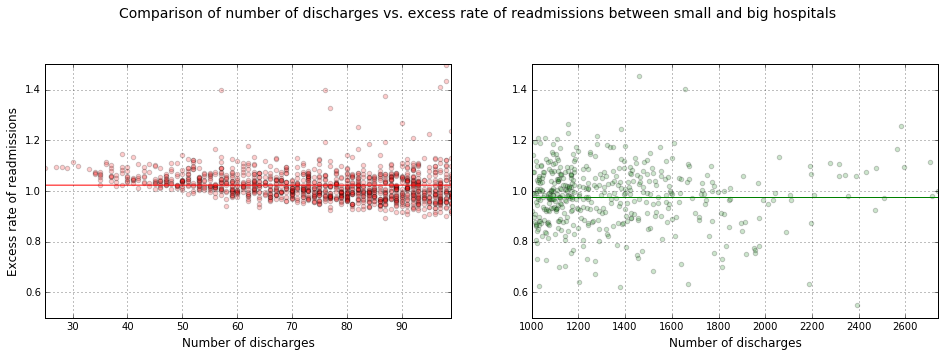

In [88]:
x_low = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]['Number of Discharges'][81:]
y_low = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'][81:]

x_high = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]['Number of Discharges'][:-3]
y_high = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio'][:-3]

y_low_guide = [1.023]*len(x_low.values)
y_high_guide = [0.978]*len(x_high.values)
fig = plt.figure(figsize=(16,10))

ax1 = fig.add_subplot(221)
ax1.scatter(x_low, y_low, alpha=0.2, c = 'r')
ax1.plot(x_low, y_low_guide, c = 'r')

ax1.set(xlim = [min(x_low), max(x_low)], ylim = [0.5, 1.5])
ax1.set_xlabel('Number of discharges', fontsize=12)
ax1.set_ylabel('Excess rate of readmissions', fontsize=12)

ax2 = fig.add_subplot(222)
ax2.scatter(x_high, y_high, alpha=0.2, c = 'g')
ax2.plot(x_high, y_high_guide, c = 'g')

ax2.set(xlim = [min(x_high), max(x_high)], ylim = [0.5, 1.5])
ax2.set_xlabel('Number of discharges', fontsize=12)

ax1.grid(True)
ax2.grid(True)
fig.suptitle('Comparison of number of discharges vs. excess rate of readmissions between small and big hospitals', fontsize=14)